# Adapting pyannote.audio pretrained speaker diarization pipeline to your own data

[pyannote.audio](https://github.com/pyannote/pyannote-audio) is an open-source toolkit written in Python for speaker diarization.



⚠ Make sure that you switch to a GPU runtime (Runtime > Change runtime type).  


## Installation


In [4]:
!pip install -qq pyannote.audio
!pip install -qq rich

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 811.0/811.0 kB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.3/119.3 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 807.2/807.2 kB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 10.7 MB/s eta 0:00:0

⚠ Restart the runtime (Runtime > Restart session).  
If you don't, `pyannote.database` will throw an error below.

## Data preparation

First things first: we need Annotated data.

For the this, we rely on the AMI-SDM (single distance microphone) corpus whose audio is attenuated to create new low intensity data.


In [1]:
!pip show pyannote.audio

Name: pyannote.audio
Version: 3.3.2
Summary: Neural building blocks for speaker diarization
Home-page: https://github.com/pyannote/pyannote-audio
Author: Hervé Bredin
Author-email: herve.bredin@irit.fr
License: mit
Location: /usr/local/lib/python3.10/dist-packages
Requires: asteroid-filterbanks, einops, huggingface-hub, lightning, omegaconf, pyannote.core, pyannote.database, pyannote.metrics, pyannote.pipeline, pytorch-metric-learning, rich, semver, soundfile, speechbrain, tensorboardX, torch, torch-audiomentations, torchaudio, torchmetrics
Required-by: 


In [ ]:
# download AMI-SDM mini corpus
%cd /content/
!git clone https://github.com/pyannote/AMI-diarization-setup
%cd /content/AMI-diarization-setup/pyannote/
# !bash download_ami_sdm_mini.sh

/content
Cloning into 'AMI-diarization-setup'...
remote: Enumerating objects: 977, done.
remote: Counting objects: 100% (977/977), done.
remote: Compressing objects: 100% (429/429), done.
remote: Total 977 (delta 390), reused 949 (delta 369), pack-reused 0 (from 0)
Receiving objects: 100% (977/977), 1.67 MiB | 14.75 MiB/s, done.
Resolving deltas: 100% (390/390), done.
/content/AMI-diarization-setup/pyannote


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/amicorpus.zip -d /content/AMI-diarization-setup/pyannote/

Archive:  /content/amicorpus.zip
   creating: /content/AMI-diarization-setup/pyannote/amicorpus/
   creating: /content/AMI-diarization-setup/pyannote/amicorpus/ES2002a/
   creating: /content/AMI-diarization-setup/pyannote/amicorpus/ES2002a/audio/
  inflating: /content/AMI-diarization-setup/pyannote/amicorpus/ES2002a/audio/ES2002a.Array1-01.wav  
   creating: /content/AMI-diarization-setup/pyannote/amicorpus/ES2003a/
   creating: /content/AMI-diarization-setup/pyannote/amicorpus/ES2003a/audio/
  inflating: /content/AMI-diarization-setup/pyannote/amicorpus/ES2003a/audio/ES2003a.Array1-01.wav  
   creating: /content/AMI-diarization-setup/pyannote/amicorpus/ES2004a/
   creating: /content/AMI-diarization-setup/pyannote/amicorpus/ES2004a/audio/
  inflating: /content/AMI-diarization-setup/pyannote/amicorpus/ES2004a/audio/ES2004a.Array1-01.wav  
   creating: /content/AMI-diarization-setup/pyannote/amicorpus/ES2005a/
   creating: /content/AMI-diarization-setup/pyannote/amicorpus/ES2005a/audio/


In [ ]:
!PYANNOTE_DATABASE_CONFIG="/content/AMI-diarization-setup/pyannote/database.yml" pyannote-database info AMI-SDM.SpeakerDiarization.mini

'AMI-SDM.SpeakerDiarization.only_words' found in /content/AMI-diarization-setup/pyannote/database.yml does not define the 'scope' of speaker labels (file, database, or global). Setting it to 'file'.
'AMI-SDM.SpeakerDiarization.mini' found in /content/AMI-diarization-setup/pyannote/database.yml does not define the 'scope' of speaker labels (file, database, or global). Setting it to 'file'.
'AMI.SpeakerDiarization.only_words' found in /content/AMI-diarization-setup/pyannote/database.yml does not define the 'scope' of speaker labels (file, database, or global). Setting it to 'file'.
'AMI.SpeakerDiarization.mini' found in /content/AMI-diarization-setup/pyannote/database.yml does not define the 'scope' of speaker labels (file, database, or global). Setting it to 'file'.
'AMI.SpeakerDiarization.word_and_vocalsounds' found in /content/AMI-diarization-setup/pyannote/database.yml does not define the 'scope' of speaker labels (file, database, or global). Setting it to 'file'.
train
   28 files
 

In [ ]:
from pyannote.database import registry, FileFinder

registry.load_database("AMI-diarization-setup/pyannote/database.yml")
dataset = registry.get_protocol("AMI-SDM.SpeakerDiarization.mini", {"audio": FileFinder()})

'AMI-SDM.SpeakerDiarization.only_words' found in /content/AMI-diarization-setup/pyannote/database.yml does not define the 'scope' of speaker labels (file, database, or global). Setting it to 'file'.
'AMI-SDM.SpeakerDiarization.mini' found in /content/AMI-diarization-setup/pyannote/database.yml does not define the 'scope' of speaker labels (file, database, or global). Setting it to 'file'.
'AMI.SpeakerDiarization.only_words' found in /content/AMI-diarization-setup/pyannote/database.yml does not define the 'scope' of speaker labels (file, database, or global). Setting it to 'file'.
'AMI.SpeakerDiarization.mini' found in /content/AMI-diarization-setup/pyannote/database.yml does not define the 'scope' of speaker labels (file, database, or global). Setting it to 'file'.
'AMI.SpeakerDiarization.word_and_vocalsounds' found in /content/AMI-diarization-setup/pyannote/database.yml does not define the 'scope' of speaker labels (file, database, or global). Setting it to 'file'.


## Pretrained pipeline

First we run the pretrained model to evaluate its performance.

Official [pyannote.audio](https://github.com/pyannote/pyannote-audio) pipelines (i.e. those under the [`pyannote` organization](https://hf.co/pyannote) umbrella) are open-source, but gated. It means that you have to first accept users conditions on their respective Huggingface page to access the pretrained weights and hyper-parameters.


In [ ]:
from pyannote.audio import Pipeline
import torch

HUGGINGFACE_TOKEN = "Token was here."
pretrained_pipeline = Pipeline.from_pretrained("pyannote/speaker-diarization", use_auth_token=HUGGINGFACE_TOKEN)
pretrained_pipeline.to(torch.device('cuda'))


INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.5.4 to v2.4.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../root/.cache/torch/pyannote/models--pyannote--segmentation/snapshots/c4c8ceafcbb3a7a280c2d357aee9fbc9b0be7f9b/pytorch_model.bin`


Model was trained with pyannote.audio 0.0.1, yours is 3.3.2. Bad things might happen unless you revert pyannote.audio to 0.x.
Model was trained with torch 1.10.0+cu102, yours is 2.4.1+cu121. Bad things might happen unless you revert torch to 1.x.


In [ ]:
# this takes approximately 2min to run on Google Colab GPU
from pyannote.metrics.diarization import DiarizationErrorRate
metric = DiarizationErrorRate()

for file in dataset.test():
    # apply pretrained pipeline
    file["pretrained pipeline"] = pretrained_pipeline(file)

    # evaluate its performance
    metric(file["annotation"], file["pretrained pipeline"], uem=file["annotated"])

print(f"The pretrained pipeline reaches a Diarization Error Rate (DER) of {100 * abs(metric):.1f}% on {dataset.name} test set.")

The pretrained pipeline reaches a Diarization Error Rate (DER) of 37.3% on AMI-SDM.SpeakerDiarization.mini test set.


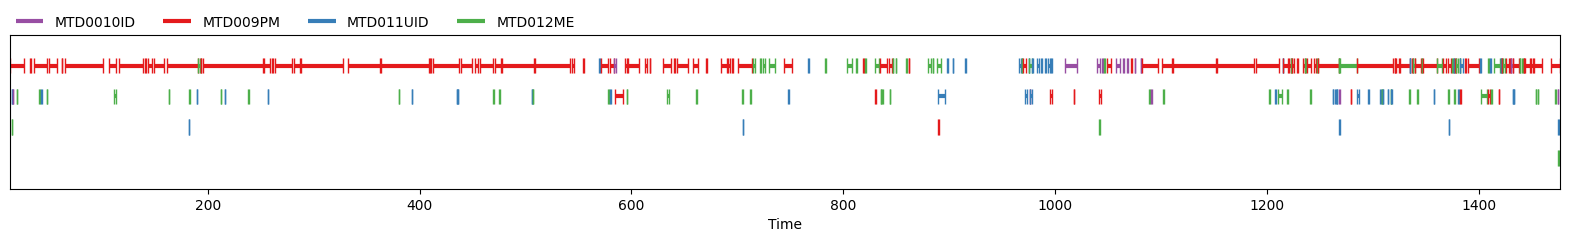

In [ ]:
file["annotation"]

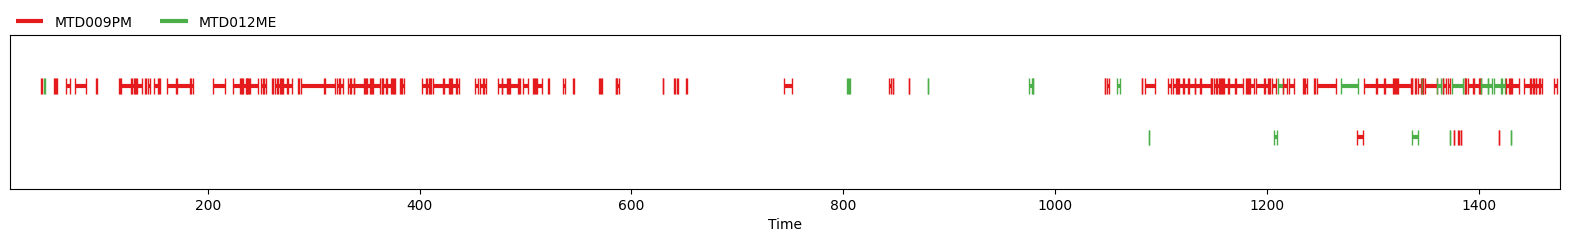

In [ ]:
file["pretrained pipeline"]

## Fine-tuning the segmentation model

When a sufficiently large training set of labeled conversations is available, fine-tuning the internal speaker segmentation model may lead to significant performance boost.

Starting from the pretrained model...

In [ ]:
from pyannote.audio import Model
model = Model.from_pretrained("pyannote/segmentation", use_auth_token=HUGGINGFACE_TOKEN)
model.to(torch.device('cuda'))

INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.5.4 to v2.4.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../root/.cache/torch/pyannote/models--pyannote--segmentation/snapshots/660b9e20307a2b0cdb400d0f80aadc04a701fc54/pytorch_model.bin`


Model was trained with pyannote.audio 0.0.1, yours is 3.3.2. Bad things might happen unless you revert pyannote.audio to 0.x.
Model was trained with torch 1.10.0+cu102, yours is 2.4.1+cu121. Bad things might happen unless you revert torch to 1.x.


PyanNet(
  (sincnet): SincNet(
    (wav_norm1d): InstanceNorm1d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
    (conv1d): ModuleList(
      (0): Encoder(
        (filterbank): ParamSincFB()
      )
      (1): Conv1d(80, 60, kernel_size=(5,), stride=(1,))
      (2): Conv1d(60, 60, kernel_size=(5,), stride=(1,))
    )
    (pool1d): ModuleList(
      (0-2): 3 x MaxPool1d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
    )
    (norm1d): ModuleList(
      (0): InstanceNorm1d(80, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
      (1-2): 2 x InstanceNorm1d(60, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
    )
  )
  (lstm): LSTM(60, 128, num_layers=4, batch_first=True, dropout=0.5, bidirectional=True)
  (linear): ModuleList(
    (0): Linear(in_features=256, out_features=128, bias=True)
    (1): Linear(in_features=128, out_features=128, bias=True)
  )
  (classifier): Linear(in_features=128, out_features=3, bias=

... we prepare it for fine-tuning on the training dataset:

In [ ]:
from pyannote.audio.tasks import Segmentation
task = Segmentation(
    dataset,
    duration=model.specifications.duration,
    max_num_speakers=len(model.specifications.classes),
    batch_size=32,
    num_workers=1,
    loss="bce",
    vad_loss="bce")
model.task = task
model.prepare_data()
model.setup()

Protocol AMI-SDM.SpeakerDiarization.mini does not precompute the output of torchaudio.info(): adding a 'torchaudio.info' preprocessor for you to speed up dataloaders. See pyannote.database documentation on how to do that yourself.


The actual training is done with [`lightning`](https://github.com/Lightning-AI/lightning):

In [ ]:
# this takes approximately 15min to run on Google Colab GPU
from types import MethodType
from torch.optim import Adam
from pytorch_lightning.callbacks import (
    EarlyStopping,
    ModelCheckpoint,
    RichProgressBar,
)

# we use Adam optimizer with 1e-4 learning rate
def configure_optimizers(self):
    return Adam(self.parameters(), lr=1e-4)

model.configure_optimizers = MethodType(configure_optimizers, model)

# we monitor diarization error rate on the validation set
# and use to keep the best checkpoint and stop early
monitor, direction = task.val_monitor
checkpoint = ModelCheckpoint(
    monitor=monitor,
    mode=direction,
    save_top_k=1,
    every_n_epochs=1,
    save_last=False,
    save_weights_only=False,
    filename="{epoch}",
    verbose=False,
)
early_stopping = EarlyStopping(
    monitor=monitor,
    mode=direction,
    min_delta=0.0,
    patience=10,
    strict=True,
    verbose=False,
)

# Create an instance of the MetricsLogger
metrics_logger = MetricsLogger()

callbacks = [RichProgressBar(), checkpoint, early_stopping, metrics_logger]

# we train for at most 20 epochs (might be shorter in case of early stopping)
from pytorch_lightning import Trainer
trainer = Trainer(accelerator="gpu",
                  callbacks=callbacks,
                  max_epochs=5,
                  gradient_clip_val=0.5)

model.train()

trainer.fit(model)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃   ┃ Name              ┃ Type             ┃ Params ┃ Mode  ┃      In sizes ┃                           Out sizes ┃
┡━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ 0 │ sincnet           │ SincNet          │ 42.6 K │ train │ [1, 1, 80000] │                        [1, 60, 293] │
│ 1 │ lstm              │ LSTM             │  1.4 M │ train │  [1, 293, 60] │   [[1, 293, 256], [[8, 1, 128], [8, │
│   │                   │                  │        │       │               │                           1, 128]]] │
│ 2 │ linear            │ ModuleList       │ 49.4 K │ train │             ? │                                   ? │
│ 3 │ classifier        │ Linear           │    387 │ train │ [1, 293, 128] │                         [1, 293, 3] │
│ 4 │ activation        │ Sigmoid          │      0 │ train │   [1, 293, 3] │                         [1, 293, 3] │
│ 5 │ validation_metric │ MetricCollection │      0 │ train │             ? │                                   ? │
└───┴───────────────────┴──────────────────┴────────┴───────┴───────────────┴─────────────────────────────────────┘

Trainable params: 1.5 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.5 M                                                                                                
Total estimated model params size (MB): 5                                                                          
Modules in train mode: 27                                                                                          
Modules in eval mode: 0

Output()

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


No metrics were logged during training.


In [ ]:
# save path to the best checkpoint for later use
finetuned_model = checkpoint.best_model_path

# uncomment to download the checkpoint
#from google.colab import files
#files.download(finetuned_model)

In [ ]:
from pyannote.audio import Model

# Load the best model from the checkpoint
best_model = Model.from_pretrained(finetuned_model)

# Set the model to evaluation mode
best_model.eval()

# Define the path where you want to save the model
output_path = "/content/drive/MyDrive/finetuned_pyannote_model.pth"

# Save the model's state dictionary
torch.save(best_model.state_dict(), output_path)

print(f"Finetuned model saved to {output_path}")


Finetuned model saved to /content/drive/MyDrive/finetuned_pyannote_model.pth


## Optimizing the pipeline hyper-parameters

The pretrained `pyannote/speaker-diarization` pipeline relies on its own set of hyper-parameters adapted to the internal `pyannote/segmentation` pretrained model:

In [ ]:
pretrained_hyperparameters = pretrained_pipeline.parameters(instantiated=True)
pretrained_hyperparameters

{'segmentation': {'min_duration_off': 0.5817029604921046,
  'threshold': 0.4442333667381752},
 'clustering': {'method': 'centroid',
  'min_cluster_size': 15,
  'threshold': 0.7153814381597874}}

In [ ]:
from pyannote.audio.pipelines import SpeakerDiarization
from pyannote.pipeline import Optimizer

pipeline = SpeakerDiarization(
    segmentation=finetuned_model,
    clustering="OracleClustering",
)
pipeline.to(torch.device('cuda'))
# as reported in the technical report, min_duration_off can safely be set to 0.0
pipeline.freeze({"segmentation": {"min_duration_off": 0.0}})

optimizer = Optimizer(pipeline)
dev_set = list(dataset.development())

iterations = optimizer.tune_iter(dev_set, show_progress=False)
best_loss = 1.0
for i, iteration in enumerate(iterations):
    print(f"Best segmentation threshold so far: {iteration['params']['segmentation']['threshold']}")
    if i > 50: break   # 50 iterations should give slightly better results

Best segmentation threshold so far: 0.10432237133986116
Best segmentation threshold so far: 0.764334017333
Best segmentation threshold so far: 0.764334017333
Best segmentation threshold so far: 0.764334017333
Best segmentation threshold so far: 0.6413189814489401
Best segmentation threshold so far: 0.3761418718102214
Best segmentation threshold so far: 0.3761418718102214
Best segmentation threshold so far: 0.3761418718102214
Best segmentation threshold so far: 0.3761418718102214
Best segmentation threshold so far: 0.3761418718102214
Best segmentation threshold so far: 0.4890216702253015
Best segmentation threshold so far: 0.4890216702253015
Best segmentation threshold so far: 0.4890216702253015
Best segmentation threshold so far: 0.4890216702253015
Best segmentation threshold so far: 0.4890216702253015
Best segmentation threshold so far: 0.4890216702253015
Best segmentation threshold so far: 0.4890216702253015
Best segmentation threshold so far: 0.4890216702253015
Best segmentation thr

Then, we use the optimized value of `segmentation.threshold` and optimize `clustering.threshold`.

In [ ]:
best_segmentation_threshold = optimizer.best_params["segmentation"]["threshold"]

In [ ]:
pipeline = SpeakerDiarization(
    segmentation=finetuned_model,
    embedding=pretrained_pipeline.embedding,
    embedding_exclude_overlap=pretrained_pipeline.embedding_exclude_overlap,
    clustering=pretrained_pipeline.klustering,
)
pipeline.to(torch.device('cuda'))
pipeline.freeze({
    "segmentation": {
        "threshold": best_segmentation_threshold,
        "min_duration_off": 0.0,
    },
    "clustering": {
        "method": "centroid",
        "min_cluster_size": 15,
    },
})

optimizer = Optimizer(pipeline)
iterations = optimizer.tune_iter(dev_set, show_progress=False)
best_loss = 1.0
for i, iteration in enumerate(iterations):
    print(f"Best clustering threshold so far: {iteration['params']['clustering']['threshold']}")
    if i > 50: break  # 50 iterations should give slightly better results

Best clustering threshold so far: 1.5079897577854542
Best clustering threshold so far: 1.5079897577854542
Best clustering threshold so far: 1.5079897577854542
Best clustering threshold so far: 0.8214233463423468
Best clustering threshold so far: 0.8214233463423468
Best clustering threshold so far: 0.703770779639592
Best clustering threshold so far: 0.703770779639592
Best clustering threshold so far: 0.703770779639592
Best clustering threshold so far: 0.703770779639592
Best clustering threshold so far: 0.703770779639592
Best clustering threshold so far: 0.703770779639592
Best clustering threshold so far: 0.703770779639592
Best clustering threshold so far: 0.703770779639592
Best clustering threshold so far: 0.703770779639592
Best clustering threshold so far: 0.703770779639592
Best clustering threshold so far: 0.703770779639592
Best clustering threshold so far: 0.703770779639592
Best clustering threshold so far: 0.703770779639592
Best clustering threshold so far: 0.703770779639592
Best cl

Finally, we use the optimized values of `segmentation.threshold` and `clustering.threshold` to evaluate the performance of the finetuned pipeline:

In [ ]:
best_clustering_threshold = optimizer.best_params['clustering']['threshold']

In [ ]:
finetuned_pipeline = SpeakerDiarization(
    segmentation=finetuned_model,
    embedding=pretrained_pipeline.embedding,
    embedding_exclude_overlap=pretrained_pipeline.embedding_exclude_overlap,
    clustering=pretrained_pipeline.klustering,
)
finetuned_pipeline.to(torch.device('cuda'))

finetuned_pipeline.instantiate({
    "segmentation": {
        "threshold": best_segmentation_threshold,
        "min_duration_off": 0.0,
    },
    "clustering": {
        "method": "centroid",
        "min_cluster_size": 15,
        "threshold": best_clustering_threshold,
    },
})

metric = DiarizationErrorRate()

for file in dataset.test():
    # apply finetuned pipeline
    file["finetuned pipeline"] = finetuned_pipeline(file)

    # evaluate its performance
    metric(file["annotation"], file["finetuned pipeline"], uem=file["annotated"])

print(f"The finetuned pipeline reaches a Diarization Error Rate (DER) of {100 * abs(metric):.1f}% on {dataset.name} test set.")

The finetuned pipeline reaches a Diarization Error Rate (DER) of 27.0% on AMI-SDM.SpeakerDiarization.mini test set.


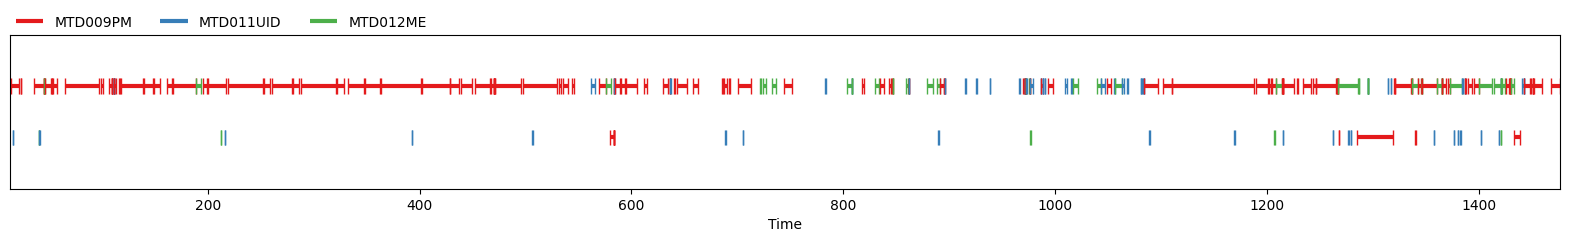

In [ ]:
file["finetuned pipeline"]

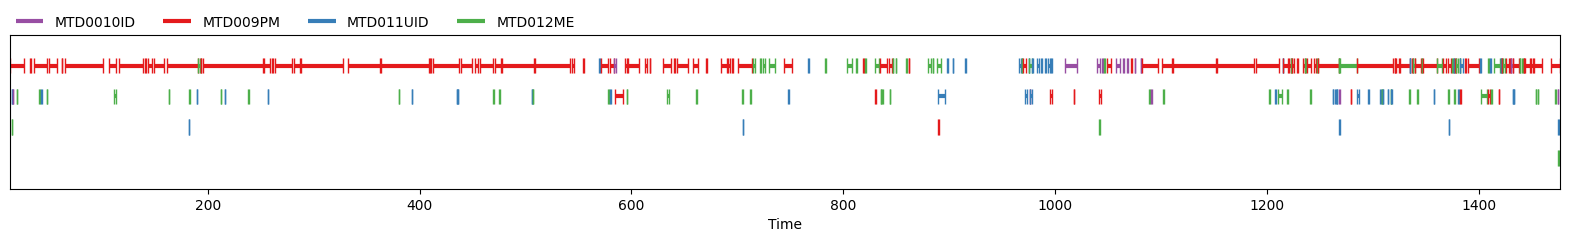

In [ ]:
file["annotation"]

In [ ]:
## Exporting the finetuned model

from pyannote.audio import Model
import torch

# Load the best model from the checkpoint
best_model = Model.from_pretrained(finetuned_model)

# Set the model to evaluation mode
best_model.eval()

# Define the path where you want to save the model
output_path = "/content/finetuned_pyannote_model"

# Save the model
torch.save(best_model.state_dict(), output_path)

print(f"Finetuned model saved to {output_path}")

# To verify, you can load the model back
loaded_model = Model.from_pretrained("pyannote/segmentation", use_auth_token=HUGGINGFACE_TOKEN)
loaded_model.load_state_dict(torch.load(output_path))
print("Model loaded successfully!")

# If you want to use the model in the pipeline
finetuned_pipeline.segmentation = loaded_model